# Major Project

## Data Analysis

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# converting the excel files to pandas dataframe
train_df = pd.read_excel("train_data.xlsx")

test_df = pd.read_excel("test_data.xlsx")

In [3]:
# Examining the dataframes
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


As we can see, the name of the model of the car does not matter but the features do

So we will delete this feature.

In [5]:
train_df.drop(["Name"], axis = 1, inplace = True)

In [6]:
test_df.drop(["Name"], axis = 1, inplace = True)

Let's look at the dataframes again

In [7]:
train_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
test_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


Let's look at the data types for the test and train dataframes

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 517.4+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           1234 non-null   object 
 1   Year               1234 non-null   int64  
 2   Kilometers_Driven  1234 non-null   int64  
 3   Fuel_Type          1234 non-null   object 
 4   Transmission       1234 non-null   object 
 5   Owner_Type         1234 non-null   object 
 6   Mileage            1234 non-null   object 
 7   Engine             1224 non-null   object 
 8   Power              1224 non-null   object 
 9   Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 96.5+ KB


### Now let's look at the relation between the price of the car and the input features

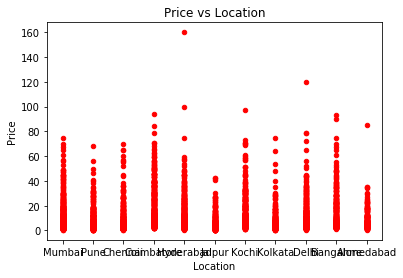

In [11]:
train_df.plot.scatter(x = "Location", y = "Price", color = "r", title = "Price vs Location")

Almost all the cities are having a similar price.

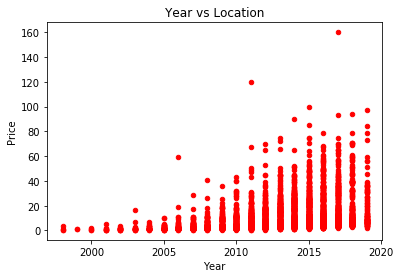

In [12]:
train_df.plot.scatter(x = "Year", y = "Price", color = "r", title = "Year vs Location")

The price seems to be increasing with every year

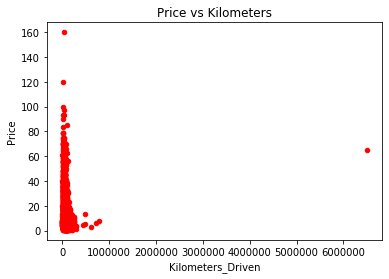

In [13]:
train_df.plot.scatter(x = "Kilometers_Driven", y = "Price", color = "r", title = "Price vs Kilometers")

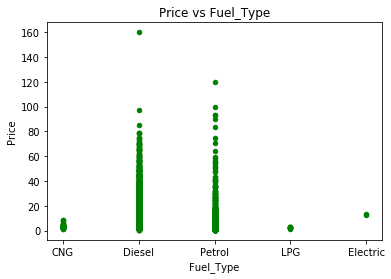

In [14]:
train_df.plot.scatter(x = "Fuel_Type", y = "Price", color = "g", title = "Price vs Fuel_Type")

We can ignore electric, CNG and LPG while making our final dataset

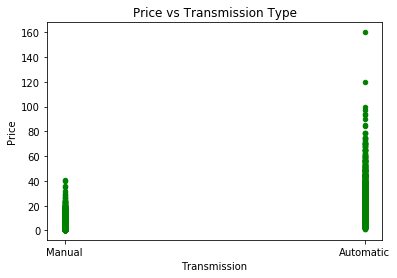

In [15]:
train_df.plot.scatter(x = "Transmission", y = "Price", color = "g", title = "Price vs Transmission Type")

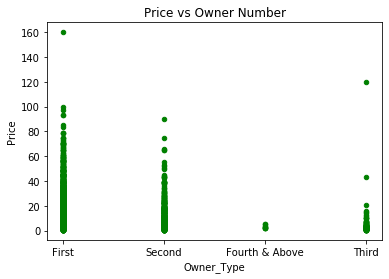

In [16]:
train_df.plot.scatter(x = "Owner_Type", y = "Price", color = "g", title = "Price vs Owner Number")

In [17]:
print(train_df["Owner_Type"].value_counts())
print(test_df["Owner_Type"].value_counts())

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64
First             1023
Second             184
Third               24
Fourth & Above       3
Name: Owner_Type, dtype: int64


 We see that the first and second hand cars are more expensive

Fourth and above are too little in number to make a difference

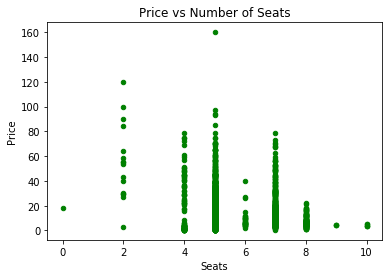

In [18]:
train_df.plot.scatter(x = "Seats", y = "Price", color = "g", title = "Price vs Number of Seats")

## Feature Engineering and dealing with missing values

Categorical Features

In [19]:
# We now use one-hot encoding for categorical features with non-ascending, non-binary values
# get_dummies() does this for us

train_df = pd.get_dummies(train_df, columns = ["Location", "Fuel_Type", "Transmission", "Owner_Type"])

test_df = pd.get_dummies(test_df, columns = ["Location", "Fuel_Type", "Transmission", "Owner_Type"])

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   int64  
 1   Kilometers_Driven          6019 non-null   int64  
 2   Mileage                    6017 non-null   object 
 3   Engine                     5983 non-null   object 
 4   Power                      5983 non-null   object 
 5   Seats                      5977 non-null   float64
 6   Price                      6019 non-null   float64
 7   Location_Ahmedabad         6019 non-null   uint8  
 8   Location_Bangalore         6019 non-null   uint8  
 9   Location_Chennai           6019 non-null   uint8  
 10  Location_Coimbatore        6019 non-null   uint8  
 11  Location_Delhi             6019 non-null   uint8  
 12  Location_Hyderabad         6019 non-null   uint8  
 13  Location_Jaipur            6019 non-null   uint8

In [21]:
# now we need to drop the unecessary columns
train_df.drop(["Fuel_Type_CNG", "Fuel_Type_LPG", "Fuel_Type_Electric", "Owner_Type_Fourth & Above"], axis = 1, inplace = True)

In [22]:
test_df.drop(["Fuel_Type_CNG", "Fuel_Type_LPG", "Owner_Type_Fourth & Above"], axis = 1, inplace = True)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6019 non-null   int64  
 1   Kilometers_Driven       6019 non-null   int64  
 2   Mileage                 6017 non-null   object 
 3   Engine                  5983 non-null   object 
 4   Power                   5983 non-null   object 
 5   Seats                   5977 non-null   float64
 6   Price                   6019 non-null   float64
 7   Location_Ahmedabad      6019 non-null   uint8  
 8   Location_Bangalore      6019 non-null   uint8  
 9   Location_Chennai        6019 non-null   uint8  
 10  Location_Coimbatore     6019 non-null   uint8  
 11  Location_Delhi          6019 non-null   uint8  
 12  Location_Hyderabad      6019 non-null   uint8  
 13  Location_Jaipur         6019 non-null   uint8  
 14  Location_Kochi          6019 non-null   

### Handling Missing values and Outliers

Seats

In [24]:
median_no_seats = train_df["Seats"].median()
train_df["Seats"].fillna(median_no_seats, inplace = True)

In [25]:
median_no_seats = test_df["Seats"].median()
test_df["Seats"].fillna(median_no_seats, inplace = True)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6019 non-null   int64  
 1   Kilometers_Driven       6019 non-null   int64  
 2   Mileage                 6017 non-null   object 
 3   Engine                  5983 non-null   object 
 4   Power                   5983 non-null   object 
 5   Seats                   6019 non-null   float64
 6   Price                   6019 non-null   float64
 7   Location_Ahmedabad      6019 non-null   uint8  
 8   Location_Bangalore      6019 non-null   uint8  
 9   Location_Chennai        6019 non-null   uint8  
 10  Location_Coimbatore     6019 non-null   uint8  
 11  Location_Delhi          6019 non-null   uint8  
 12  Location_Hyderabad      6019 non-null   uint8  
 13  Location_Jaipur         6019 non-null   uint8  
 14  Location_Kochi          6019 non-null   

Outliers in Kilometers Driven

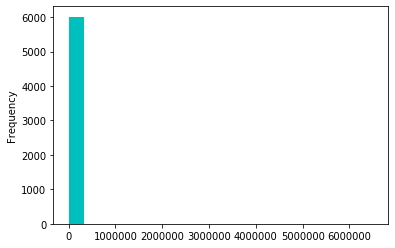

In [27]:
# histogram for kilometers driven

train_df.Kilometers_Driven.plot(kind = "hist", bins = 20, color = "c")

In [28]:
# look into the outliers
train_df.loc[train_df.Kilometers_Driven == train_df.Kilometers_Driven.max()]

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third
2328,2017,6500000,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


In [29]:
# create the kilometers_driven bin data feature, that we will use later...
train_df["Kilometers_Bin"] = pd.qcut(train_df.Kilometers_Driven, 4, labels = ["very_low", "low", "high", "very_high"])

test_df["Kilometers_Bin"] = pd.qcut(test_df.Kilometers_Driven, 4, labels = ["very_low", "low", "high", "very_high"])

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Year                    6019 non-null   int64   
 1   Kilometers_Driven       6019 non-null   int64   
 2   Mileage                 6017 non-null   object  
 3   Engine                  5983 non-null   object  
 4   Power                   5983 non-null   object  
 5   Seats                   6019 non-null   float64 
 6   Price                   6019 non-null   float64 
 7   Location_Ahmedabad      6019 non-null   uint8   
 8   Location_Bangalore      6019 non-null   uint8   
 9   Location_Chennai        6019 non-null   uint8   
 10  Location_Coimbatore     6019 non-null   uint8   
 11  Location_Delhi          6019 non-null   uint8   
 12  Location_Hyderabad      6019 non-null   uint8   
 13  Location_Jaipur         6019 non-null   uint8   
 14  Location_Kochi          

Now we want to one-hot encode the Kilometers_Bin feature

In [31]:
train_df = pd.get_dummies(train_df, columns = ["Kilometers_Bin"])

test_df = pd.get_dummies(test_df, columns = ["Kilometers_Bin"])

In [32]:
# Now let's drop the useless columns
train_df.drop(["Kilometers_Driven"], axis = 1, inplace = True)

test_df.drop(["Kilometers_Driven"], axis = 1, inplace = True)

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      6019 non-null   int64  
 1   Mileage                   6017 non-null   object 
 2   Engine                    5983 non-null   object 
 3   Power                     5983 non-null   object 
 4   Seats                     6019 non-null   float64
 5   Price                     6019 non-null   float64
 6   Location_Ahmedabad        6019 non-null   uint8  
 7   Location_Bangalore        6019 non-null   uint8  
 8   Location_Chennai          6019 non-null   uint8  
 9   Location_Coimbatore       6019 non-null   uint8  
 10  Location_Delhi            6019 non-null   uint8  
 11  Location_Hyderabad        6019 non-null   uint8  
 12  Location_Jaipur           6019 non-null   uint8  
 13  Location_Kochi            6019 non-null   uint8  
 14  Location

#### Modifying the "Engine" feature

In [34]:
train_df["Engine"].fillna("0 0", inplace = True)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      6019 non-null   int64  
 1   Mileage                   6017 non-null   object 
 2   Engine                    6019 non-null   object 
 3   Power                     5983 non-null   object 
 4   Seats                     6019 non-null   float64
 5   Price                     6019 non-null   float64
 6   Location_Ahmedabad        6019 non-null   uint8  
 7   Location_Bangalore        6019 non-null   uint8  
 8   Location_Chennai          6019 non-null   uint8  
 9   Location_Coimbatore       6019 non-null   uint8  
 10  Location_Delhi            6019 non-null   uint8  
 11  Location_Hyderabad        6019 non-null   uint8  
 12  Location_Jaipur           6019 non-null   uint8  
 13  Location_Kochi            6019 non-null   uint8  
 14  Location

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1234 non-null   int64  
 1   Mileage                   1234 non-null   object 
 2   Engine                    1224 non-null   object 
 3   Power                     1224 non-null   object 
 4   Seats                     1234 non-null   float64
 5   Location_Ahmedabad        1234 non-null   uint8  
 6   Location_Bangalore        1234 non-null   uint8  
 7   Location_Chennai          1234 non-null   uint8  
 8   Location_Coimbatore       1234 non-null   uint8  
 9   Location_Delhi            1234 non-null   uint8  
 10  Location_Hyderabad        1234 non-null   uint8  
 11  Location_Jaipur           1234 non-null   uint8  
 12  Location_Kochi            1234 non-null   uint8  
 13  Location_Kolkata          1234 non-null   uint8  
 14  Location

Extracting only the number(engine volume)

In [37]:
for i in train_df["Engine"]:
    
    if type(i) == float:
        continue
    
    else:
        p = i.split(' ')
    
        train_df.loc[train_df["Engine"] == i, "Engine"] = float(p[0])

In [38]:
for i in test_df["Engine"]:
    
    if type(i) == float:
        continue
    
    else:
        p = i.split(' ')
    
        test_df.loc[test_df["Engine"] == i, "Engine"] = float(p[0])

In [39]:
train_df["Engine"]

0        998
1       1582
2       1199
3       1248
4       1968
        ... 
6014    1248
6015    1120
6016    2498
6017     998
6018     936
Name: Engine, Length: 6019, dtype: object

In [40]:
test_df["Engine"]

0        998
1        796
2       2393
3       1364
4       1197
        ... 
1229    1598
1230    1197
1231    1461
1232    1197
1233    2148
Name: Engine, Length: 1234, dtype: object

Filling the empty(0) values with median

In [41]:
train_df.loc[train_df["Engine"] == 0, "Engine"] = train_df["Engine"].median()

In [42]:
train_df.loc[train_df['Engine'].isnull()]

,Year,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Kilometers_Bin_very_low,Kilometers_Bin_low,Kilometers_Bin_high,Kilometers_Bin_very_high


In [43]:
test_df.loc[test_df['Mileage'].isnull()]

,Year,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Kilometers_Bin_very_low,Kilometers_Bin_low,Kilometers_Bin_high,Kilometers_Bin_very_high


#### Modifying the Mileage feature

In [44]:
train_df["Mileage"].fillna("0 0", inplace = True)

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      6019 non-null   int64  
 1   Mileage                   6019 non-null   object 
 2   Engine                    6019 non-null   object 
 3   Power                     5983 non-null   object 
 4   Seats                     6019 non-null   float64
 5   Price                     6019 non-null   float64
 6   Location_Ahmedabad        6019 non-null   uint8  
 7   Location_Bangalore        6019 non-null   uint8  
 8   Location_Chennai          6019 non-null   uint8  
 9   Location_Coimbatore       6019 non-null   uint8  
 10  Location_Delhi            6019 non-null   uint8  
 11  Location_Hyderabad        6019 non-null   uint8  
 12  Location_Jaipur           6019 non-null   uint8  
 13  Location_Kochi            6019 non-null   uint8  
 14  Location

In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1234 non-null   int64  
 1   Mileage                   1234 non-null   object 
 2   Engine                    1224 non-null   object 
 3   Power                     1224 non-null   object 
 4   Seats                     1234 non-null   float64
 5   Location_Ahmedabad        1234 non-null   uint8  
 6   Location_Bangalore        1234 non-null   uint8  
 7   Location_Chennai          1234 non-null   uint8  
 8   Location_Coimbatore       1234 non-null   uint8  
 9   Location_Delhi            1234 non-null   uint8  
 10  Location_Hyderabad        1234 non-null   uint8  
 11  Location_Jaipur           1234 non-null   uint8  
 12  Location_Kochi            1234 non-null   uint8  
 13  Location_Kolkata          1234 non-null   uint8  
 14  Location

Extracting the number(mileage)

In [47]:
for i in train_df["Mileage"]:
    
    if type(i) == float:
        continue
        
    else:
        p = i.split(' ')
    
        train_df.loc[train_df["Mileage"] == i, "Mileage"] = float(p[0])

In [48]:
for i in test_df["Mileage"]:
    
    if type(i) == float:
        continue
        
    else:
        p = i.split(' ')
    
        test_df.loc[test_df["Mileage"] == i, "Mileage"] = float(p[0])

In [49]:
train_df["Mileage"]

0        26.6
1       19.67
2        18.2
3       20.77
4        15.2
        ...  
6014     28.4
6015     24.4
6016       14
6017     18.9
6018    25.44
Name: Mileage, Length: 6019, dtype: object

In [50]:
test_df["Mileage"]

0       32.26
1        24.7
2       13.68
3       23.59
4        18.5
        ...  
1229    20.54
1230    17.21
1231    23.08
1232     17.2
1233       10
Name: Mileage, Length: 1234, dtype: object

Filling the empty(0) values with median

In [51]:
train_df.loc[train_df["Mileage"] == 0, "Mileage"] = train_df["Mileage"].median()

In [52]:
train_df.loc[train_df['Mileage'].isnull()]

,Year,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Kilometers_Bin_very_low,Kilometers_Bin_low,Kilometers_Bin_high,Kilometers_Bin_very_high


In [53]:
test_df.loc[test_df['Mileage'].isnull()]

,Year,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Kilometers_Bin_very_low,Kilometers_Bin_low,Kilometers_Bin_high,Kilometers_Bin_very_high


#### Modifying the Power feature

The power feature is directly proportional to the engine feature

So we can get rid of the Power feature

In [54]:
train_df.drop(["Power"], axis = 1, inplace = True)
test_df.drop(["Power"], axis = 1, inplace = True)

#### Converting the object data type to numeric

In [55]:
train_df["Engine"] = train_df.Engine.astype(float)
train_df["Mileage"] = train_df.Mileage.astype(float)

test_df["Engine"] = train_df.Engine.astype(float)
test_df["Mileage"] = train_df.Mileage.astype(float)

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      6019 non-null   int64  
 1   Mileage                   6019 non-null   float64
 2   Engine                    6019 non-null   float64
 3   Seats                     6019 non-null   float64
 4   Price                     6019 non-null   float64
 5   Location_Ahmedabad        6019 non-null   uint8  
 6   Location_Bangalore        6019 non-null   uint8  
 7   Location_Chennai          6019 non-null   uint8  
 8   Location_Coimbatore       6019 non-null   uint8  
 9   Location_Delhi            6019 non-null   uint8  
 10  Location_Hyderabad        6019 non-null   uint8  
 11  Location_Jaipur           6019 non-null   uint8  
 12  Location_Kochi            6019 non-null   uint8  
 13  Location_Kolkata          6019 non-null   uint8  
 14  Location

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1234 non-null   int64  
 1   Mileage                   1234 non-null   float64
 2   Engine                    1234 non-null   float64
 3   Seats                     1234 non-null   float64
 4   Location_Ahmedabad        1234 non-null   uint8  
 5   Location_Bangalore        1234 non-null   uint8  
 6   Location_Chennai          1234 non-null   uint8  
 7   Location_Coimbatore       1234 non-null   uint8  
 8   Location_Delhi            1234 non-null   uint8  
 9   Location_Hyderabad        1234 non-null   uint8  
 10  Location_Jaipur           1234 non-null   uint8  
 11  Location_Kochi            1234 non-null   uint8  
 12  Location_Kolkata          1234 non-null   uint8  
 13  Location_Mumbai           1234 non-null   uint8  
 14  Location

## Model Creation and Training

In [58]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [59]:
# creating the numpy data arrays
Y = train_df["Price"].ravel()

train_df.drop(["Price"], axis = 1, inplace = True)

X = train_df.to_numpy().astype("float")

x_pred = test_df.to_numpy().astype("float")

In [60]:
print(X.shape)
print(Y.shape)
print(Y)

(6019, 26)
(6019,)
[ 1.75 12.5   4.5  ...  2.9   2.65  2.5 ]


In [161]:
# test_size = 0.2 tells us that validation occurs with 20% of the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42) 

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4514, 26)
(4514,)
(1505, 26)
(1505,)


In [162]:
print(Y_train)

[28.   13.5   2.6  ...  9.    4.95  5.5 ]


### Logistic Regression Model

In [163]:
# create the model
model_lr_1 = linear_model.RidgeCV(alphas = [1e-3, 1e-2, 1e-1, 1])

#### Feature Normalization and Scaling

In [164]:
# getting the necessary functions
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [165]:
# we scale all the values to (0.0, 1.0) range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

Looking at the max and min values

In [166]:
X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max()

(0.0, 1.0)

In [167]:
#normalise the test data
X_test_scaled = scaler.transform(X_test)

In [168]:
# training the model
model_lr_1.fit(X_train_scaled, Y_train)

RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [169]:
print(model_lr_1.score(X_test_scaled, Y_test))

0.659946350002182


In [171]:
predictions = model_lr_1.predict(x_pred)
print(predictions)

[ 91830.76073057 126050.04685423 103613.76963812 ... 161048.73787226
  98950.01104882 158985.78342547]


In [173]:
#submissions data frame
df_submission = pd.DataFrame({"Car number" : test_df.index, "Price" : predictions})

In [174]:
df_submission.to_csv("predictions.csv", index = False)